In [1]:
#importing the modules to use

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy.stats import poisson,skellam
import statsmodels.formula.api as smf
import datetime
import statsmodels.api as sm


#reading the data from the disk
#we use pd as an object of the module pandas to read data
#we will use English, spanish and italian top flight 2020/2021 data for the model

Premier_League = pd.read_csv("E0.csv")
Laliga = pd.read_csv("SP1.csv")
SerieA = pd.read_csv("I1.csv")

#combine all these csv files to one dataset

Data = pd.concat([Premier_League, Laliga, SerieA], axis=0, sort=True)
print(Data.head())



   AC  AF  AHCh   AHh  AR  AS  AST  AY  Avg<2.5  Avg>2.5  ...  VCCD  VCCH  \
0   5   8  0.50  0.50   0  22    4   0     1.73     2.16  ...  3.25  3.90   
1   4   9 -1.00 -1.00   0  10    3   2     2.29     1.65  ...  4.10  1.65   
2   6   7  0.25  0.25   0  14    8   1     1.57     2.46  ...  3.13  3.13   
3   2  11 -1.50 -1.50   0   4    1   0     2.06     1.79  ...  5.00  1.33   
4   8  15 -0.50 -0.50   0   6    3   0     1.79     2.07  ...  3.30  2.00   

    VCD   VCH    WHA   WHCA  WHCD  WHCH   WHD   WHH  
0  3.40  4.10   1.90   2.05  3.00  3.90  3.40  4.00  
1  4.40  1.55   5.80   5.50  4.20  1.57  4.33  1.52  
2  3.10  3.13   2.45   2.45  3.00  3.10  3.00  3.20  
3  5.75  1.25  13.00  10.00  5.25  1.30  5.50  1.25  
4  3.40  1.95   4.00   3.90  3.40  1.95  3.40  1.95  

[5 rows x 106 columns]


In [2]:
#cleaning the data
#first drop the unnecessary cloumns from the dataset, we will use the following columns only
#HomeTeam, Awayteam, FTHG(full time home goals), FTAG(Full time Away Goals), 

Data = Data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

#drop null values
Data = Data.dropna()
print(Data)

       HomeTeam        AwayTeam  FTHG  FTAG
0     Brentford         Arsenal     2     0
1    Man United           Leeds     5     1
2       Burnley        Brighton     1     2
3       Chelsea  Crystal Palace     3     0
4       Everton     Southampton     3     1
..          ...             ...   ...   ...
204       Parma         Udinese     2     0
205   Sampdoria        Sassuolo     0     0
206      Verona           Lecce     3     0
207        Roma           Lazio     1     1
208      Napoli        Juventus     2     1

[568 rows x 4 columns]


Home goals average
1.5140845070422535
Away Goals average
1.204225352112676


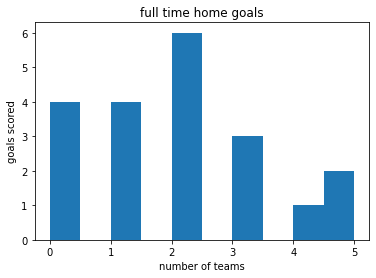

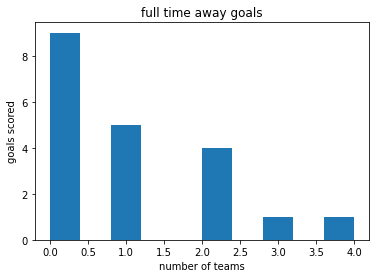

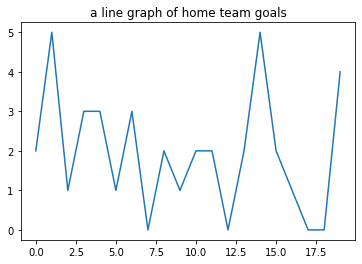

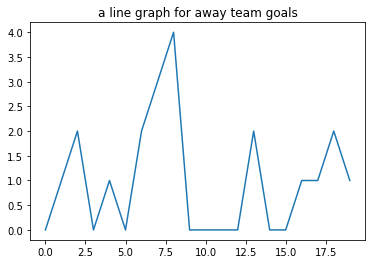

In [7]:
#performing exploratory data analysis (EDA)

#find the mean of homegoals

Homegoals = Data['FTHG']
print("Home goals average")
print(Homegoals.mean())

#find the mean of awayGoals

AwayGoals = Data['FTAG']
print("Away Goals average")
print(AwayGoals.mean())

#plot a graph comparing home goals and away goals
#plot an histogram of the first 20 rows
Data['FTHG'].head(20).plot(kind='hist')
plt.title("full time home goals")
plt.xlabel("number of teams")
plt.ylabel("goals scored")

plt.show()

#plot an histogram for the first 20 rows of the FTAG column

Data['FTAG'].head(20).plot(kind='hist')
plt.title("full time away goals")
plt.xlabel("number of teams")
plt.ylabel("goals scored")

plt.show()

#plot a line graph for home team scores
Data['FTHG'].head(20).plot(kind='line')
plt.title("a line graph of home team goals")
plt.show()

#plot a line graph for away team scores

Data['FTAG'].head(20).plot(kind='line')
plt.title("a line graph for away team goals")
plt.show()



In [ ]:
#creating the model using poisson distribution
#the first step is renaming the columns to make them more user-friendly
#we then assign the newly renamed column home as 0
model_data = pd.concat([Data[['HomeTeam', 'AwayTeam', 'FTHG']].assign(home=1).rename(
    columns={'HomeTeam':'team', 'AwayTeam':'opponent', 'FTHG':'goals'}),
                             Data[['AwayTeam', 'HomeTeam', 'FTAG']].assign(home=0).rename(
                                 columns={'AwayTeam':'team', 'HomeTeam':'opponent', 'FTAG':'goals'})])

model_poisson = smf.glm(formula="goals ~ home + team + opponent", data = model_data,
                        family=sm.families.Poisson()).fit()
def predict_match(foot_model, hometeam,awayteam, max_goals=10):
    home_goals_avg = foot_model.predict(pd.DataFrame(data={'team':hometeam,
                                                           'opponent': awayteam, 'home':1},
                                                     index=[1])).values[0]
    away_goals_avg = foot_model.predict(pd.DataFrame(data={'team':awayteam,
                                                           'opponent':hometeam, 'home':0},
                                                     index=[1])).values[0]
    team_pred = [[poisson.pmf(i, team_avg) for i in range(0, max_goals+1)] for team_avg in [home_goals_avg, away_goals_avg]]
    print(hometeam , "VS", awayteam)
    return(np.outer(np.array(team_pred[0]), np.array(team_pred[1])))
#make the program run in a continous loop till the user exits using while loop
while True:
    try:
        
       Home = input("Enter home team: ")
       Away = input("enter away Team: ")
       predict = predict_match(model_poisson,Home,Away,max_goals=10)
    #probability of home team to win
       print("HomeTeam :", np.sum(np.tril(predict, -1)) *100, "%")
       #probability of draw
       print("Draw: ", np.sum(np.diag(predict)) * 100, "%")
       #probality of awayTeam to win
       print("AwayTeam : ", np.sum(np.triu(predict, 1)) * 100, "%")
        #if either the home team or the away team entered does not exist in the dataset, display the error below and continue
    except Exception as e:
        print("either the home team or the away team do not march our records please enter and try again")
        pass
   



Enter home team: Everton
enter away Team: Liverpool
Everton VS Liverpool
HomeTeam : 5.802671193375096 %
Draw:  9.60638824916861 %
AwayTeam :  84.49646911759038 %
Enter home team: Liverpool
enter away Team: Newcastle
Liverpool VS Newcastle
HomeTeam : 94.38037728433974 %
Draw:  1.4967942534251386 %
AwayTeam :  0.5191603226160557 %
Enter home team: Chelsea
enter away Team: Man United
Chelsea VS Man United
HomeTeam : 82.08891685739022 %
Draw:  12.254124257372458 %
AwayTeam :  5.6437522106020905 %
Enter home team: Juventus
enter away Team: Napoli
Juventus VS Napoli
HomeTeam : 64.99902640110035 %
Draw:  20.055230022200547 %
AwayTeam :  14.94458532171068 %


In [ ]:
#in conclusion, using poisson distribution to approximate the distribution of goals between two teams is a fairly accurate algoritm
#that can be used to predict games in real time with updated data. The model is based on an assumption that the home team
#has a 60% percent more chances of winning a game compared to the away team. By using the goals scored by both teams in the 
#previous games, we can predict the outcome using a poisson regression model.